# TensorFlow

참고 : TensorFlow Machine Learning Cookbook

In [1]:
import tensorflow as tf
sess = tf.Session()

C:\Users\GIGABYTE\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
import numpy as np
import matplotlib.pyplot as plt

### 모델 평가

##### 회귀

In [3]:
batch_size = 25

x_vals = np.random.normal(1, 0.1, 100)
y_vals = np.repeat(10., 100)
x_data = tf.placeholder(shape=[None,1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None,1], dtype=tf.float32)

train_indices = np.random.choice(len(x_vals), round(len(x_vals)*0.8), replace=False)
test_indices = np.array(list(set(range(len(x_vals))) - set(train_indices)))

x_vals_train = x_vals[train_indices]
x_vals_test = x_vals[test_indices]
y_vals_train = y_vals[train_indices]
y_vals_test = y_vals[test_indices]
A = tf.Variable(tf.random_normal(shape=[1,1]))

my_output = tf.matmul(x_data, A)
loss = tf.reduce_mean(tf.square(my_output - y_target))

my_opt = tf.train.GradientDescentOptimizer(0.02)
train_step = my_opt.minimize(loss)

init = tf.global_variables_initializer()
sess.run(init)

for i in range(100):
    rand_index = np.random.choice(len(x_vals_train), size=batch_size)
    rand_x = np.transpose([x_vals_train[rand_index]])
    rand_y = np.transpose([y_vals_train[rand_index]])
    
    sess.run(train_step, feed_dict={x_data:rand_x, y_target:rand_y})
    
    if (i+1) % 25 == 0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)))
        print('Loss = ' + str(sess.run(loss, feed_dict={x_data:rand_x, y_target:rand_y})) + '\n')

Step #25 A = [[5.857861]]
Loss = 15.000184

Step #50 A = [[8.398263]]
Loss = 3.959828

Step #75 A = [[9.245838]]
Loss = 1.9525205

Step #100 A = [[9.524381]]
Loss = 1.123541



In [4]:
# 모델 평가
mse_test = sess.run(loss, feed_dict={x_data:np.transpose([x_vals_test]), y_target:np.transpose([y_vals_test])})
mse_train = sess.run(loss, feed_dict={x_data:np.transpose([x_vals_train]), y_target:np.transpose([y_vals_train])})
print('MSE on train : ' + str(np.round(mse_train, 2)))
print('MSE on test : ' + str(np.round(mse_test, 2)))

MSE on train : 1.26
MSE on test : 1.0


##### 분류

In [5]:
batch_size = 25

x_vals = np.concatenate((np.random.normal(-1, 1, 50), np.random.normal(2, 1, 50)))
y_vals = np.concatenate((np.repeat(0., 50), np.repeat(1., 50)))
x_data = tf.placeholder(shape=[1,None], dtype=tf.float32)
y_target = tf.placeholder(shape=[1,None], dtype=tf.float32)

train_indices = np.random.choice(len(x_vals), round(len(x_vals)*0.8), replace=False)
test_indices = np.array(list(set(range(len(x_vals))) - set(train_indices)))

x_vals_train = x_vals[train_indices]
x_vals_test = x_vals[test_indices]
y_vals_train = y_vals[train_indices]
y_vals_test = y_vals[test_indices]
A = tf.Variable(tf.random_normal(mean=10, shape=[1]))

my_output = tf.add(x_data, A)
xentropy = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=my_output, labels=y_target))

my_opt = tf.train.GradientDescentOptimizer(0.05)
train_step = my_opt.minimize(xentropy)

init = tf.global_variables_initializer()
sess.run(init)

for i in range(1800):
    rand_index = np.random.choice(len(x_vals_train), size=batch_size)
    rand_x = [x_vals_train[rand_index]]
    rand_y = [y_vals_train[rand_index]]
    
    sess.run(train_step, feed_dict={x_data:rand_x, y_target:rand_y})
    
    if (i+1) % 200 == 0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)))
        print('Loss = ' + str(sess.run(xentropy, feed_dict={x_data:rand_x, y_target:rand_y})) + '\n')

Step #200 A = [3.8651848]
Loss = 0.83649194

Step #400 A = [0.73937696]
Loss = 0.2535453

Step #600 A = [-0.20580101]
Loss = 0.20383671

Step #800 A = [-0.38637546]
Loss = 0.2729069

Step #1000 A = [-0.45265344]
Loss = 0.27583775

Step #1200 A = [-0.41371876]
Loss = 0.23972599

Step #1400 A = [-0.45660144]
Loss = 0.30964535

Step #1600 A = [-0.45388013]
Loss = 0.2834604

Step #1800 A = [-0.472365]
Loss = 0.34935188



In [6]:
y_prediction = tf.squeeze(tf.round(tf.nn.sigmoid(tf.add(x_data, A))))
correct_prediction = tf.equal(y_prediction, y_target)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
acc_value_test = sess.run(accuracy, feed_dict={x_data:[x_vals_test], y_target:[y_vals_test]})
acc_value_train = sess.run(accuracy, feed_dict={x_data:[x_vals_train], y_target:[y_vals_train]})
print('Accuracy on train set : ' + str(acc_value_train))
print('Accuracy on test set : ' + str(acc_value_test))

Accuracy on train set : 0.9375
Accuracy on test set : 0.95


##### 시각화

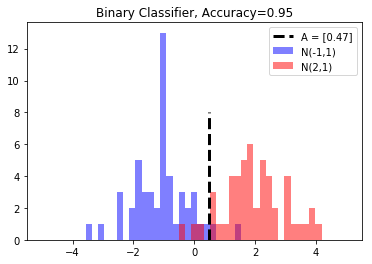

In [7]:
A_result = -sess.run(A)
bins = np.linspace(-5, 5, 50)
plt.hist(x_vals[0:50], bins, alpha=0.5, label='N(-1,1)', color='blue')
plt.hist(x_vals[50:100], bins[0:50], alpha=0.5, label='N(2,1)', color='red')
plt.plot((A_result, A_result), (0, 8), 'k--', linewidth=3, label='A = '+str(np.round(A_result, 2)))
plt.legend(loc='upper right')
plt.title('Binary Classifier, Accuracy='+str(np.round(acc_value_test,2)))
plt.show()